## 🌊 Regresión lineal

#### Librerías y ajustes iniciales

In [1]:
from sklearn.linear_model import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
#from ml_flow_utils import MLFlow
from sklearn.metrics import max_error, root_mean_squared_error, median_absolute_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
pd.options.display.max_columns = 50 # para mostrar todas las columnas

In [3]:
# FIJAMOS SEMILLA ALEATORIA
RANDOM_STATE = 777

### 🔨 Construcción de modelos

Habrá que mover a otro dataframe, modelos planteados:
1. Regresión lineal sin regularizar
2. Regresión Ridge
3. Regresión Lasso
4. Regresión Elastic

Lo mismo pero con las variables escalonadas(+4)

Transformar variable respuesta para que sea simétrica? (boxcox) (+4)

In [4]:
def calcular_metricas(y_true, y_predict):
    return {
        "MAX_ERROR": max_error(y_true, y_predict),
        "ROOT_MEAN_SQ_ERROR": root_mean_squared_error(y_true, y_predict),
        "MEDIAN_ABS_ERROR": median_absolute_error(y_true, y_predict),
        "MEAN_ABS_ERROR": mean_absolute_error(y_true, y_predict),
    }

In [5]:
df = pd.read_parquet("../../clean/df_definitivo.parquet")
y_name = "AlturaOlas"
X = df.drop(columns=y_name)
y = df[y_name]

#### Separación en train y test

In [6]:
# Para el modelo con todas las variables
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

#### Distribuciones de a variable respuesta en train y test

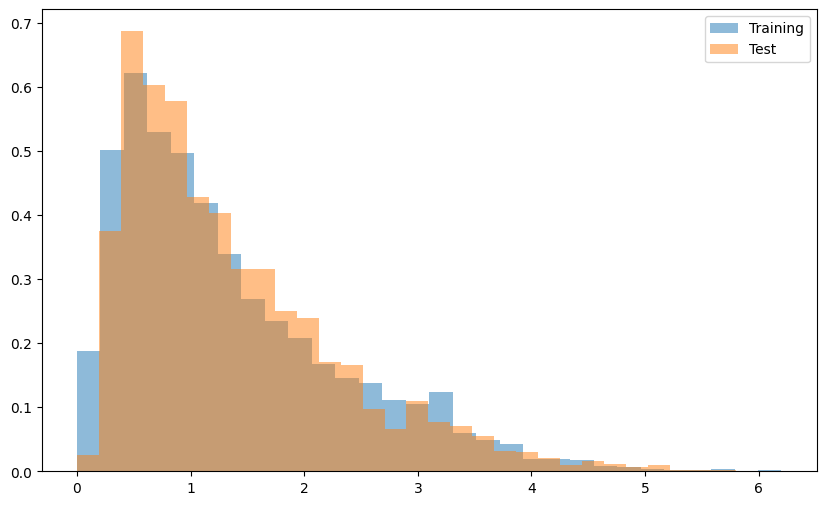

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(y_train, bins=30, alpha=0.5, label='Training', density=True)
ax.hist(y_test, bins=30, alpha=0.5, label='Test', density=True)
plt.legend()

### Modelos usando el conjunto de datos completo

Analizando las funciones de densidad de los dos conjuntos vemos que se parecen bastante, a excepción de las olas de altura menor a 0.5, las cuáles parecen estar en mayor proporción en training que en el conjunto test.

In [8]:
params = {
    "random_state": [RANDOM_STATE],
    "alpha": [i/100 for i in range(1, 101, 2)],
    "max_iter": [100, 500, 1000, 2000, 5000],
}

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
calcular_metricas(y_test, lr.predict(X_test))

{'MAX_ERROR': 2.0881327770908857,
 'ROOT_MEAN_SQ_ERROR': 0.446717617687334,
 'MEDIAN_ABS_ERROR': 0.29258942895024365,
 'MEAN_ABS_ERROR': 0.34769398486813213}

In [10]:
rdg = Ridge()
rdgSearch = GridSearchCV(rdg, params, cv=5)
rdgSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [11]:
rdgSearch.best_estimator_

Ridge(alpha=0.99, max_iter=100, random_state=777)

In [12]:
calcular_metricas(y_test, rdgSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.088622841588725,
 'ROOT_MEAN_SQ_ERROR': 0.4467124980916621,
 'MEDIAN_ABS_ERROR': 0.2923441574544454,
 'MEAN_ABS_ERROR': 0.347684610522248}

In [13]:
las = Lasso()
lasSearch = GridSearchCV(las, params, cv=5)
lasSearch.fit(X_train, y_train)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.729e+01, tolerance: 5.177e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.007e+01, tolerance: 5.224e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [14]:
lasSearch.best_estimator_

Lasso(alpha=0.01, max_iter=500, random_state=777)

In [15]:
calcular_metricas(y_test, lasSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.165791029746421,
 'ROOT_MEAN_SQ_ERROR': 0.4547390393206339,
 'MEDIAN_ABS_ERROR': 0.2927782674110868,
 'MEAN_ABS_ERROR': 0.3535045954151522}

In [16]:
el = ElasticNet() # reemplazar alpha por l1_ratio...
elSearch = GridSearchCV(el, params, cv=5)
elSearch.fit(X_train, y_train)

/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+02, tolerance: 5.177e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+01, tolerance: 5.224e-01
  model = cd_fast.enet_coordinate_descent(
/Users/tyomikjan/UNIVERSITY/PD1/PD/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [17]:
elSearch.best_estimator_

ElasticNet(alpha=0.01, max_iter=500, random_state=777)

In [18]:
calcular_metricas(y_test, elSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.1427610669819703,
 'ROOT_MEAN_SQ_ERROR': 0.450875150709542,
 'MEDIAN_ABS_ERROR': 0.2901103090469199,
 'MEAN_ABS_ERROR': 0.3504808722041735}

### Modelo usando selección de variables

#### Seleccion de variables

In [19]:
cols = ['anio', 'mes', 'dia', 'moonphase', 'hora', 'temp', 'rh', 'pressure',
       'vis', 'uv_index', 'wdir_E', 'wdir_ENE', 'wdir_ESE', 'wdir_N',
       'wdir_NE', 'wdir_NNE', 'wdir_NNW', 'wdir_NW', 'wdir_S', 'wdir_SE',
       'wdir_SSE', 'wdir_SSW', 'wdir_SW', 'wdir_VAR', 'wdir_W', 'wdir_WNW',
       'wdir_WSW', 'Vviento', 'PeriodoOlas', 'Lluvia', 'Nubosidad']

X_train = X_train[cols]
X_test = X_test[cols]

#### Distribuciones de a variable respuesta en train y test

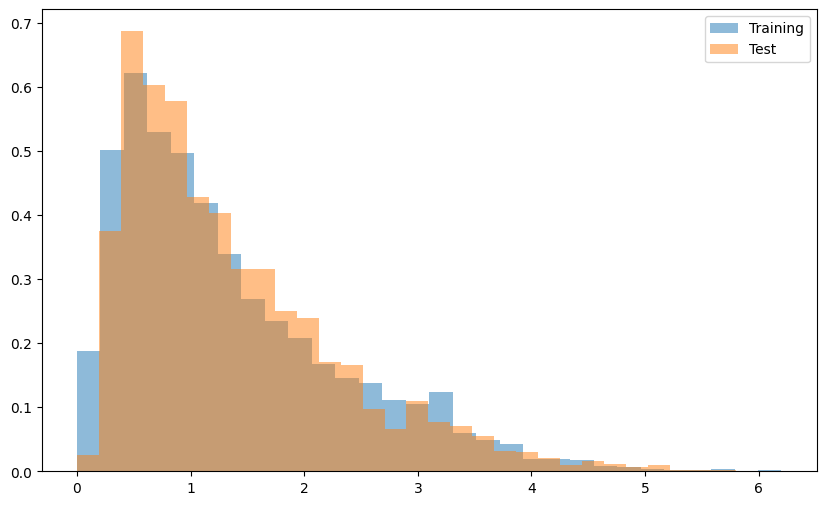

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(y_train, bins=30, alpha=0.5, label='Training', density=True)
ax.hist(y_test, bins=30, alpha=0.5, label='Test', density=True)
plt.legend()

Analizando las funciones de densidad de los dos conjuntos vemos que se parecen bastante, a excepción de las olas de altura menor a 0.5, las cuáles parecen estar en mayor proporción en training que en el conjunto test.

In [21]:
params = {
    "random_state": [RANDOM_STATE],
    "alpha": [i/100 for i in range(1, 101, 2)],
    "max_iter": [100, 500, 1000, 2000, 5000],
}

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
calcular_metricas(y_test, lr.predict(X_test))

{'MAX_ERROR': 2.0901280960586264,
 'ROOT_MEAN_SQ_ERROR': 0.4536426994778976,
 'MEDIAN_ABS_ERROR': 0.29076652481679865,
 'MEAN_ABS_ERROR': 0.3529134202324027}

In [23]:
rdg = Ridge()
rdgSearch = GridSearchCV(rdg, params, cv=5)
rdgSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [24]:
rdgSearch.best_estimator_

Ridge(alpha=0.99, max_iter=100, random_state=777)

In [25]:
calcular_metricas(y_test, rdgSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.090291844937019,
 'ROOT_MEAN_SQ_ERROR': 0.4536325384387044,
 'MEDIAN_ABS_ERROR': 0.29050421893205247,
 'MEAN_ABS_ERROR': 0.35290243906358537}

In [26]:
las = Lasso()
lasSearch = GridSearchCV(las, params, cv=5)
lasSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [27]:
lasSearch.best_estimator_

Lasso(alpha=0.01, max_iter=100, random_state=777)

In [28]:
calcular_metricas(y_test, lasSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.144537994403608,
 'ROOT_MEAN_SQ_ERROR': 0.4617254333400074,
 'MEDIAN_ABS_ERROR': 0.29344983800392865,
 'MEAN_ABS_ERROR': 0.3586904147675808}

In [29]:
el = ElasticNet() # reemplazar alpha por l1_ratio...
elSearch = GridSearchCV(el, params, cv=5)
elSearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.03, 0.05, 0.07, 0.09, 0.11, 0.13,
                                   0.15, 0.17, 0.19, 0.21, 0.23, 0.25, 0.27,
                                   0.29, 0.31, 0.33, 0.35, 0.37, 0.39, 0.41,
                                   0.43, 0.45, 0.47, 0.49, 0.51, 0.53, 0.55,
                                   0.57, 0.59, ...],
                         'max_iter': [100, 500, 1000, 2000, 5000],
                         'random_state': [777]})

In [30]:
elSearch.best_estimator_

ElasticNet(alpha=0.01, max_iter=100, random_state=777)

In [31]:
calcular_metricas(y_test, elSearch.best_estimator_.predict(X_test))

{'MAX_ERROR': 2.111253090507242,
 'ROOT_MEAN_SQ_ERROR': 0.457699142871745,
 'MEDIAN_ABS_ERROR': 0.2924422524345686,
 'MEAN_ABS_ERROR': 0.35552254815853707}